In [80]:
import pandas as pd 

k = pd.read_csv("C:/Users/Kaustubh.DESKTOP-6MT3302/Desktop/Dataset/Datasets/Cars93.csv")

In [81]:
k.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [82]:
B=k[["Price","MPG.highway"]]

In [83]:
B.head()

,Price,MPG.highway
0,15.9,31
1,33.9,25
2,29.1,26
3,37.7,26
4,30.0,30


In [84]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
results = km.fit(B)

In [85]:
results.labels_

array([0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [86]:
B['Cluster']=results.labels_

<ipython-input-86-08b9f25003e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Cluster']=results.labels_


In [87]:
B.head()

,Price,MPG.highway,Cluster
0,15.9,31,0
1,33.9,25,2
2,29.1,26,2
3,37.7,26,2
4,30.0,30,2


In [88]:
s = {0:"blue",1:"orange",2:"red"}

In [89]:
color = []
for i in B.Cluster:
    color.append(s[i])

In [90]:
B['color'] = color

<ipython-input-90-0026f0f251bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['color'] = color


In [91]:
B.head()

,Price,MPG.highway,Cluster,color
0,15.9,31,0,blue
1,33.9,25,2,red
2,29.1,26,2,red
3,37.7,26,2,red
4,30.0,30,2,red


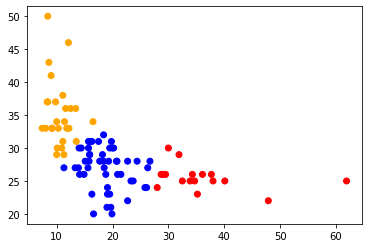

In [92]:
import matplotlib.pyplot as plt
plt.scatter(B['Price'],B['MPG.highway'],c=B['color'])

In [93]:
B = k[["Price","MPG.highway"]]
WCSS = []
k = range(2,20,1)

for i in k:
    km = KMeans(n_clusters=i)
    results = km.fit(B)
    WCSS.append(results.inertia_)

In [94]:
WCSS

[5126.276911764707,
 3042.570647814681,
 2120.046510721248,
 1584.9201622103383,
 1200.1287951186746,
 934.4497828193312,
 794.3021001076577,
 662.5160555555556,
 564.9812095959596,
 502.00077741702734,
 443.72128565878563,
 393.3664956709957,
 363.5279761904762,
 322.73730158730154,
 296.588257936508,
 264.23882828282825,
 242.91253463203455,
 218.0701139971139]

In [95]:
list(zip(k,WCSS))

[(2, 5126.276911764707),
 (3, 3042.570647814681),
 (4, 2120.046510721248),
 (5, 1584.9201622103383),
 (6, 1200.1287951186746),
 (7, 934.4497828193312),
 (8, 794.3021001076577),
 (9, 662.5160555555556),
 (10, 564.9812095959596),
 (11, 502.00077741702734),
 (12, 443.72128565878563),
 (13, 393.3664956709957),
 (14, 363.5279761904762),
 (15, 322.73730158730154),
 (16, 296.588257936508),
 (17, 264.23882828282825),
 (18, 242.91253463203455),
 (19, 218.0701139971139)]

([<matplotlib.axis.XTick at 0x227a756c0d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

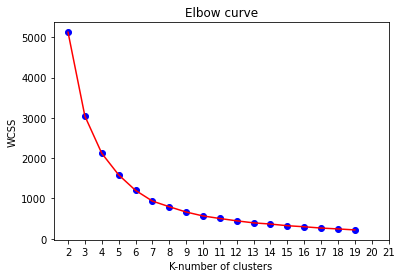

In [96]:
plt.scatter(k,WCSS,c="blue")
plt.plot(k,WCSS,c="red")
plt.xlabel("K-number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")
plt.xticks(range(2,22,1))

# Heirarchical Clustering

In [126]:
import pandas as pd
from scipy.spatial import distance_matrix
k = pd.read_csv("C:/Users/Kaustubh.DESKTOP-6MT3302/Desktop/Dataset/Datasets/Cars93.csv")
B=k[["Price","MPG.city"]]

In [127]:
B.head()

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22


In [128]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = pd.DataFrame(ss.fit_transform(B),columns=["Price","MPG.city"])

In [129]:
C.head()

,Price,MPG.city
0,-0.375720,0.471312
1,1.497844,-0.781032
2,0.998227,-0.423219
3,1.893374,-0.602126
4,1.091905,-0.065407


In [130]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5,linkage="complete")
res = agc.fit(C)
B.clusters = res.labels_

<ipython-input-130-2ca7fead63d2>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  B.clusters = res.labels_


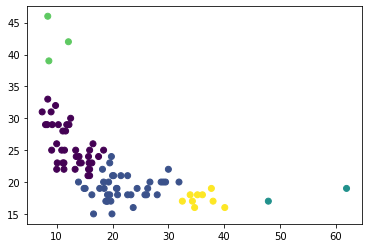

In [132]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.clusters)

In [133]:
D = pd.DataFrame(distance_matrix(C.values, C.values), index=C.index, columns=C.index)

<ipython-input-134-38a763e308b2>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram(linkage(D))


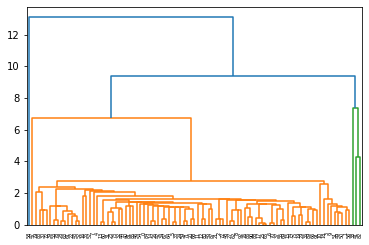

In [134]:
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(D))
plt.show()